In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
df = pd.read_csv('/content/drive/MyDrive/colab/car-prices.csv')

In [28]:
df

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [29]:
rename = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

In [30]:
df = df.rename(columns=rename)
df.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [24]:
#df['vendido'] = df['vendido'].apply(lambda x: 1 if x == 'yes' else 0)

In [31]:
df['vendido'] = df['vendido'].map({'yes':1, 'no':0})

In [32]:
df.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [33]:
from datetime import datetime
ano_atual = datetime.today().year
ano_atual

2022

In [34]:
df['idade'] = ano_atual-  df['ano_modelo']

In [35]:
df.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [36]:
df['km_por_ano'] = round(df['milhas_por_ano'] * 1.60934, 2)

In [37]:
df.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22
1,1,7843,1998,40557.96,1,24,12622.05
2,2,7109,2006,89627.50,0,16,11440.80
3,3,26823,2015,95276.14,0,7,43167.33
4,4,7935,2014,117384.68,1,8,12770.11


In [38]:
df.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_modelo'], inplace=True)

In [39]:
df['km_total'] = df['idade'] * df['km_por_ano']

In [40]:
df.head()

,preco,vendido,idade,km_por_ano,km_total
0,30941.02,1,22,35085.22,771874.84
1,40557.96,1,24,12622.05,302929.20
2,89627.50,0,16,11440.80,183052.80
3,95276.14,0,7,43167.33,302171.31
4,117384.68,1,8,12770.11,102160.88


In [41]:
df.corr()

,preco,vendido,idade,km_por_ano,km_total
preco,1.000000,-0.437865,-0.207001,-0.020552,-0.138013
vendido,-0.437865,1.000000,0.071855,-0.137252,-0.063764
idade,-0.207001,0.071855,1.000000,0.016486,0.592287
km_por_ano,-0.020552,-0.137252,0.016486,1.000000,0.787754
km_total,-0.138013,-0.063764,0.592287,0.787754,1.000000


In [42]:
import seaborn as sns

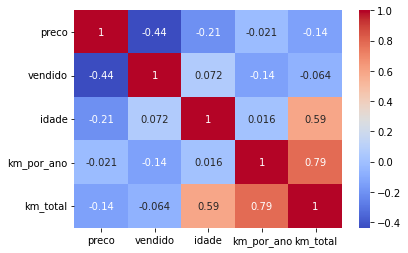

In [43]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [44]:
X = df.drop('vendido', axis=1)
Y = df['vendido']

In [45]:
X.head()

,preco,idade,km_por_ano,km_total
0,30941.02,22,35085.22,771874.84
1,40557.96,24,12622.05,302929.20
2,89627.50,16,11440.80,183052.80
3,95276.14,7,43167.33,302171.31
4,117384.68,8,12770.11,102160.88


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=Y)

In [48]:
len(x_train)

7000

In [49]:
len(x_test)

3000

In [50]:
from sklearn.dummy import DummyClassifier

In [51]:
dm_clf = DummyClassifier()

In [52]:
dm_clf.fit(x_train, y_train)

DummyClassifier()

In [53]:
dm_clf.score(x_test, y_test) * 100

57.99999999999999

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [55]:
model_tree = DecisionTreeClassifier(criterion='entropy')

In [56]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [57]:
Yhat = model_tree.predict(x_test)

In [58]:
acuracia = accuracy_score(y_test, Yhat)

In [59]:
print(acuracia * 100)

72.26666666666667


In [60]:
from sklearn.tree import export_graphviz
import graphviz

In [61]:
X.columns

Index(['preco', 'idade', 'km_por_ano', 'km_total'], dtype='object')

In [62]:
Y.value_counts()

1    5800
0    4200
Name: vendido, dtype: int64

In [63]:
features = X.columns

arvore = export_graphviz(model_tree,
                feature_names=features,
                class_names = ['sim', 'não'])

graphviz.Source(arvore)

Output hidden; open in https://colab.research.google.com to view.

In [64]:
accuracy_score(y_test, Yhat)

0.7226666666666667

In [65]:
model_tree.score(x_train, y_train) * 100

100.0

In [100]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [67]:
Yhat = model_tree.predict(x_test)

In [68]:
accuracy_score(y_test, Yhat)

0.7843333333333333

In [69]:
model_tree.score(x_train, y_train) * 100

78.85714285714286

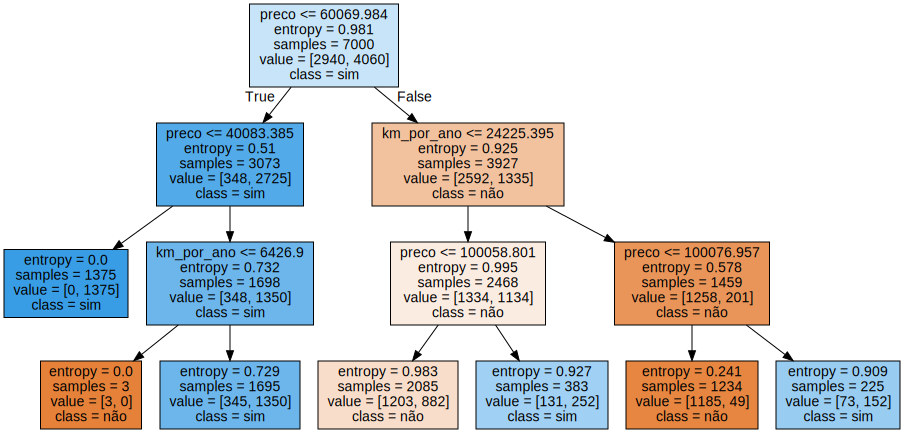

In [77]:
features = X.columns

arvore = export_graphviz(model_tree,
                feature_names=features,
                class_names = ['não', 'sim'], filled=True)

graphviz.Source(arvore)

In [94]:
from sklearn.tree import export_text

In [103]:
X.columns

Index(['preco', 'idade', 'km_por_ano', 'km_total'], dtype='object')

In [96]:
features

Index(['preco', 'idade', 'km_por_ano', 'km_total'], dtype='object')

In [104]:
# Rever
# r = export_text(model_tree, feature_names=features)

In [93]:
df[df['preco'] <= 40083.385]['vendido'].shape

(1935,)

In [91]:
df[(df['preco'] <  60069) | (df['km_por_ano'] <= 6426.9)]['vendido'].value_counts()

1    3864
0     493
Name: vendido, dtype: int64

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [72]:
precision_score(y_test, Yhat)

0.8496481126039668

In [73]:
recall_score(y_test, Yhat)

0.7632183908045977

In [74]:
cmf = confusion_matrix(y_test, Yhat)

In [75]:
import matplotlib.pyplot as plt

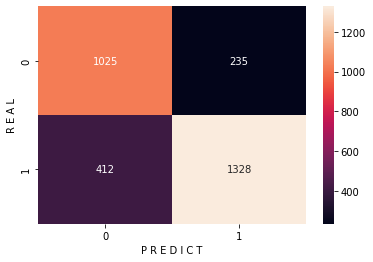

In [76]:
sns.heatmap(pd.DataFrame(cmf), annot=True, fmt='g')
plt.xlabel('P R E D I C T')
plt.ylabel('R E A L')
plt.show()